RESEARCH PAPER
https://acrobat.adobe.com/id/urn:aaid:sc:AP:072bd470-6984-4a59-a6e2-5ec6656b8c06


DATA PREPROCESSING

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer


In [ ]:
data = pd.read_csv("/content/marketing_sample_for_walmart_com-walmart_com_product_review__20200701_20201231__5k_data.tsv",sep='\t')

data.columns

Index(['Uniq Id', 'Crawl Timestamp', 'Dataset Origin', 'Product Id',
       'Product Barcode', 'Product Company Type Source',
       'Product Brand Source', 'Product Brand Normalised Source',
       'Product Name Source', 'Match Rank', 'Match Score', 'Match Type',
       'Retailer', 'Product Category', 'Product Brand', 'Product Name',
       'Product Price', 'Sku', 'Upc', 'Product Url', 'Market',
       'Product Description', 'Product Currency',
       'Product Available Inventory', 'Product Image Url',
       'Product Model Number', 'Product Tags', 'Product Contents',
       'Product Rating', 'Product Reviews Count', 'Bsr', 'Joining Key'],
      dtype='object')

In [ ]:
data = data[['Uniq Id','Product Id','Product Rating','Product Reviews Count', 'Product Category', 'Product Brand','Product Name', 'Product Image Url', 'Product Description', 'Product Tags']]

In [ ]:
data.isnull().sum()

,0
Uniq Id,0
Product Id,0
Product Rating,2806
Product Reviews Count,1654
Product Category,10
Product Brand,13
Product Name,0
Product Image Url,0
Product Description,1127
Product Tags,0


In [ ]:
data['Product Rating'].fillna(0, inplace = True)
data["Product Reviews Count"].fillna(0, inplace = True)
data["Product Category"].fillna(" ", inplace = True)
data["Product Brand"].fillna(" ", inplace = True)
data["Product Description"].fillna(" ", inplace = True)


In [ ]:
data.isnull().sum()
#data.duplicated().sum()

,0
Uniq Id,0
Product Id,0
Product Rating,0
Product Reviews Count,0
Product Category,0
Product Brand,0
Product Name,0
Product Image Url,0
Product Description,0
Product Tags,0


In [ ]:
column_name_mapping = {
'Uniq Id': 'ID',
'Product Id': 'ProdID',
'Product Rating': 'Rating',
'Product Reviews Count': 'ReviewCount',
'Product Category': 'Category',
'Product Brand': 'Brand',
'Product Name': 'Name',
'Product Image Url': 'ImageURL',
'Product Description': 'Description',
'Product Tags': 'Tags',
'Product Contents': 'Contents'
}

data.rename(columns=column_name_mapping, inplace=True)

In [ ]:
data['ID'] = data['ID'].str.extract(r'(\d+)').astype(float)
data['ProdID'] = data['ProdID'].str.extract(r'(\d+)').astype(float)

In [ ]:
data


,ID,ProdID,Rating,ReviewCount,Category,Brand,Name,ImageURL,Description,Tags
0,1.705737e+09,2.0,0.0,0.0,Premium Beauty > Premium Makeup > Premium Nail...,OPI,"OPI Infinite Shine, Nail Lacquer Nail Polish, ...",https://i5.walmartimages.com/asr/0e1f4c51-c1a4...,,"OPI Infinite Shine, Nail Lacquer Nail Polish, ..."
1,9.500000e+01,76.0,0.0,0.0,Beauty > Hair Care > Hair Color > Auburn Hair ...,Nice'n Easy,"Nice n Easy Permanent Color, 111 Natural Mediu...",https://i5.walmartimages.com/asr/9c8e42e4-13a5...,Pack of 3 Pack of 3 for the UPC: 381519000201 ...,"Nice 'n Easy Permanent Color, 111 Natural Medi..."
2,8.000000e+00,8.0,4.5,29221.0,Beauty > Hair Care > Hair Color > Permanent Ha...,Clairol,Clairol Nice N Easy Permanent Color 7/106A Nat...,https://i5.walmartimages.com/asr/e3a601c2-6a2b...,This Clairol Nice N Easy Permanent Color gives...,Clairol Nice 'N Easy Permanent Color 7/106A Na...
3,4.000000e+00,3.0,0.0,0.0,Beauty > Makeup > Lip,Kokie Cosmetics,"Kokie Professional Matte Lipstick, Hot Berry, ...",https://i5.walmartimages.com/asr/25b4b467-bc61...,Calling all matte lip lovers! Indulge in our r...,"Kokie Professional Matte Lipstick, Hot Berry, ..."
4,9.900000e+02,3.0,0.0,131.0,Seasonal > Stock Up Essentials > Personal Care...,Gillette,"Gillette TRAC II Plus Razor Blade Refills, Fit...",https://i5.walmartimages.com/asr/1a2ebb06-cd01...,"In 1971, Gillette introduced the Trac II razor...","Gillette TRAC II Plus Razor Blade Refills, Fit..."
...,...,...,...,...,...,...,...,...,...,...
4995,2.771000e+03,208.0,4.5,2.0,Household Essentials > Air Fresheners > Spray ...,Eclectic Lady,"Garden Mint Room Spray (Double Strength), 4 ou...",https://i5.walmartimages.com/asr/0e0416ae-6b70...,"Garden Mint is a lovely blend of spearmint, le...","Garden Mint Room Spray (Double Strength), 4 ou..."
4996,0.000000e+00,1.0,3.9,7484.0,Beauty > Hair Care > Hair Color > Permanent Ha...,Garnier,Garnier Nutrisse Nourishing Hair Color Creme (...,https://i5.walmartimages.com/asr/24d7a837-51f8...,Garnier Nutrisse Nourishing Hair Color Creme B...,Garnier Nutrisse Nourishing Hair Color Creme (...
4997,3.400000e+01,96.0,0.0,4.0,Beauty > Makeup > Nails,Stoneway,"Nail File Electric Drill, 6 in 1 Professional ...",https://i5.walmartimages.com/asr/d6202179-2c93...,Multifunctional : Our nail drill kit come with...,"Nail File Electric Drill, 6 in 1 Professional ..."
4998,9.000000e+00,7.0,0.0,0.0,Premium Beauty > Premium Bath & Body > Premium...,Creed,Creed Love In Black Hair And Body Wash 6.8oz/2...,https://i5.walmartimages.com/asr/3dc99239-66d2...,,Creed Love In Black Hair And Body Wash 6.8oz/2...


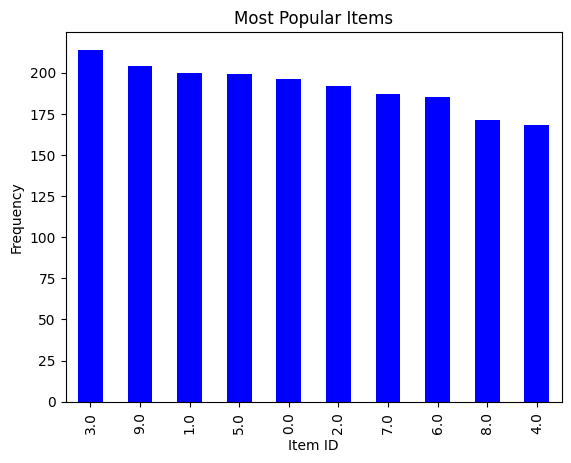

In [ ]:
pop_items = data['ProdID'].value_counts().head(10)
pop_items.plot(kind='bar',color = 'blue')
plt.title('Most Popular Items')
plt.xlabel('Item ID')
plt.ylabel('Frequency')
plt.show()

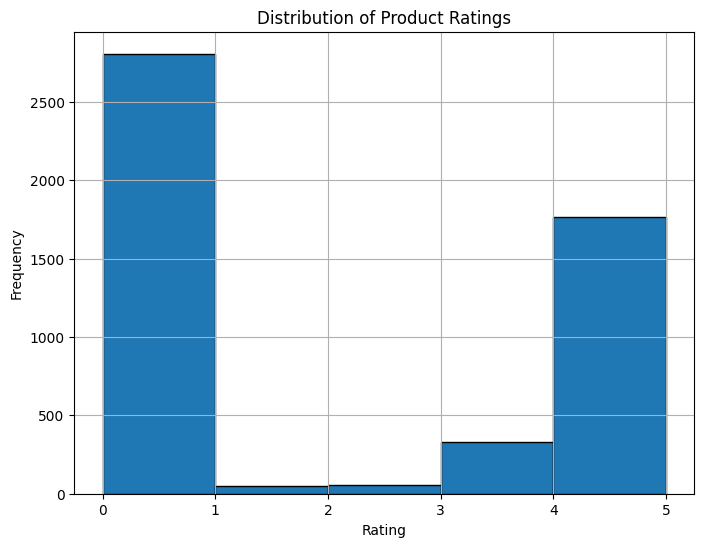

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
data['Rating'].hist(bins=5, edgecolor='black')
plt.title('Distribution of Product Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

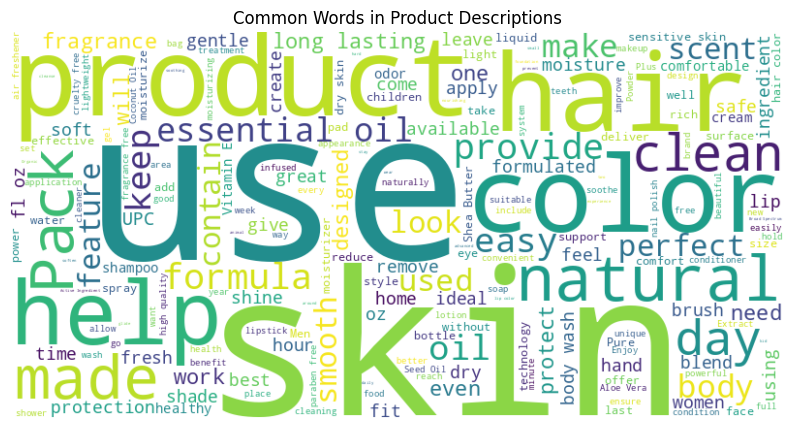

In [ ]:
from wordcloud import WordCloud

text = ' '.join(data['Description'].fillna(' '))
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Common Words in Product Descriptions')
plt.show()


STEP 2: Data Cleaning and Tags Creations

In [ ]:
import spacy
from spacy.lang.en.stop_words import STOP_WORDS
nlp = spacy.load("en_core_web_sm")
def clean_and_extract_tags(text):
  doc = nlp(text.lower())
  tags = [token.text for token in doc if token.text.isalnum() and token.text not in STOP_WORDS]
  return ', '.join(tags)
columns_to_extract_tags_from = ['Category', 'Brand', 'Description']
for column in columns_to_extract_tags_from:
  data[column] = data[column].apply(clean_and_extract_tags)

In [ ]:
data['Tags'] = data[columns_to_extract_tags_from].apply(lambda row: ', '.join(row), axis=1)

In [ ]:
data

,ID,ProdID,Rating,ReviewCount,Category,Brand,Name,ImageURL,Description,Tags
0,1.705737e+09,2.0,0.0,0.0,"premium, beauty, premium, makeup, premium, nai...",opi,"OPI Infinite Shine, Nail Lacquer Nail Polish, ...",https://i5.walmartimages.com/asr/0e1f4c51-c1a4...,,"premium, beauty, premium, makeup, premium, nai..."
1,9.500000e+01,76.0,0.0,0.0,"beauty, hair, care, hair, color, auburn, hair,...",easy,"Nice n Easy Permanent Color, 111 Natural Mediu...",https://i5.walmartimages.com/asr/9c8e42e4-13a5...,"pack, 3, pack, 3, upc, 381519000201, beautiful...","beauty, hair, care, hair, color, auburn, hair,..."
2,8.000000e+00,8.0,4.5,29221.0,"beauty, hair, care, hair, color, permanent, ha...",clairol,Clairol Nice N Easy Permanent Color 7/106A Nat...,https://i5.walmartimages.com/asr/e3a601c2-6a2b...,"clairol, nice, n, easy, permanent, color, give...","beauty, hair, care, hair, color, permanent, ha..."
3,4.000000e+00,3.0,0.0,0.0,"beauty, makeup, lip","kokie, cosmetics","Kokie Professional Matte Lipstick, Hot Berry, ...",https://i5.walmartimages.com/asr/25b4b467-bc61...,"calling, matte, lip, lovers, indulge, rich, cr...","beauty, makeup, lip, kokie, cosmetics, calling..."
4,9.900000e+02,3.0,0.0,131.0,"seasonal, stock, essentials, personal, care, s...",gillette,"Gillette TRAC II Plus Razor Blade Refills, Fit...",https://i5.walmartimages.com/asr/1a2ebb06-cd01...,"1971, gillette, introduced, trac, ii, razor, s...","seasonal, stock, essentials, personal, care, s..."
...,...,...,...,...,...,...,...,...,...,...
4995,2.771000e+03,208.0,4.5,2.0,"household, essentials, air, fresheners, spray,...","eclectic, lady","Garden Mint Room Spray (Double Strength), 4 ou...",https://i5.walmartimages.com/asr/0e0416ae-6b70...,"garden, mint, lovely, blend, spearmint, lettuc...","household, essentials, air, fresheners, spray,..."
4996,0.000000e+00,1.0,3.9,7484.0,"beauty, hair, care, hair, color, permanent, ha...",garnier,Garnier Nutrisse Nourishing Hair Color Creme (...,https://i5.walmartimages.com/asr/24d7a837-51f8...,"garnier, nutrisse, nourishing, hair, color, cr...","beauty, hair, care, hair, color, permanent, ha..."
4997,3.400000e+01,96.0,0.0,4.0,"beauty, makeup, nails",stoneway,"Nail File Electric Drill, 6 in 1 Professional ...",https://i5.walmartimages.com/asr/d6202179-2c93...,"multifunctional, nail, drill, kit, come, 6, di...","beauty, makeup, nails, stoneway, multifunction..."
4998,9.000000e+00,7.0,0.0,0.0,"premium, beauty, premium, bath, body, premium,...",creed,Creed Love In Black Hair And Body Wash 6.8oz/2...,https://i5.walmartimages.com/asr/3dc99239-66d2...,,"premium, beauty, premium, bath, body, premium,..."


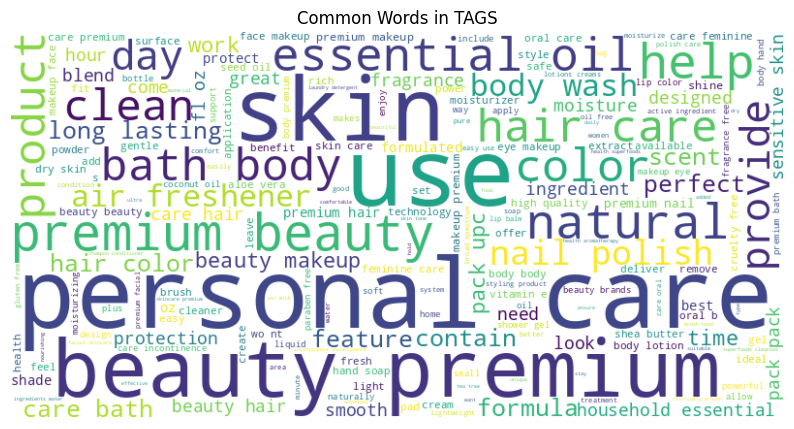

In [ ]:
from wordcloud import WordCloud

text = ' '.join(data['Tags'].fillna(' '))
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Common Words in TAGS')
plt.show()


RATING BASED RECOMMENDATIONS

In [ ]:
average_ratings = data.groupby(['Name', 'ReviewCount', 'Brand', 'ImageURL'])['Rating'].mean().reset_index()

In [ ]:
top_rated_items = average_ratings.sort_values (by='Rating', ascending=False)

In [ ]:
rating_recommendation = top_rated_items.head(10)

In [ ]:
rating_recommendation['Rating'] = rating_recommendation['Rating'].astype(int)
rating_recommendation['ReviewCount'] = rating_recommendation['ReviewCount'].astype(int)

In [ ]:
print("Rating Base Recommendation System: (Trending Products)")
rating_recommendation [ [ 'Name', 'Rating', 'ReviewCount', 'Brand', 'ImageURL']] = rating_recommendation [ [ 'Name', 'Rating', 'ReviewCount', 'Brand', 'ImageURL']]
rating_recommendation

Rating Base Recommendation System: (Trending Products)


<ipython-input-22-92930028c3e7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rating_recommendation [ [ 'Name', 'Rating', 'ReviewCount', 'Brand', 'ImageURL']] = rating_recommendation [ [ 'Name', 'Rating', 'ReviewCount', 'Brand', 'ImageURL']]


,Name,ReviewCount,Brand,ImageURL,Rating
1686,"Electric Shaver, Triple Shaving Time Electric ...",4,moosoo,https://i5.walmartimages.com/asr/e7dcd553-90df...,5
526,"Alaffia Body Lotion, Vanilla, 32 Oz",2,alaffia,https://i5.walmartimages.com/asr/2988c323-cb6f...,5
2053,"Gold Bond Ultimate Ultimate Healing Lotion, Al...",2,"gold, bond",https://i5.walmartimages.com/asr/34b610e7-05db...,5
4716,"Versace Man Eau Fraiche Eau De Toilette Spray,...",24,versace,https://i5.walmartimages.com/asr/edaaeed5-9da0...,5
2058,Goldwell StyleSign 1 Flat Marvel Straightening...,2,goldwell,https://i5.walmartimages.com/asr/3bf90289-6980...,5
3842,"Red Devil 0322 Steel Wool # 00 Very Fine, 8 Pa...",1,"red, devil",https://i5.walmartimages.com/asr/60bfe5ba-774c...,5
510,"Air Wick Plug in Starter Kit, Warmer + 1 Refil...",1,"air, wick",https://i5.walmartimages.com/asr/0fac65b2-c6aa...,5
3841,Recovery Complex Anti-Frizz Shine Serum by Bai...,4,"bain, de, terre",https://i5.walmartimages.com/asr/fcdb4d2e-3727...,5
2687,Long Aid Extra Dry Formula Curl Activator Gel ...,12,"long, aid",https://i5.walmartimages.com/asr/f7f29199-bfa5...,5
2062,"Good Sense 60-Day Air Care System, Citrus, 2 o...",1,diversey,https://i5.walmartimages.com/asr/025a7068-7bb1...,5


CONTENT BASED RECOMMENDATION SYSTEM

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics. pairwise import cosine_similarity


def content_based_recommendations (data, item_name, top_n=10):
  if item_name not in data['Name'].values:
    print (f"Item {item_name}' not found in the training data.")
    return pd.DataFrame()

  tfidf_vectorizer = TfidfVectorizer (stop_words='english')
  tfidf_matrix_content = tfidf_vectorizer.fit_transform (data['Tags'])

  cosine_similarities_content = cosine_similarity (tfidf_matrix_content, tfidf_matrix_content)
  item_index = data[data['Name'] == item_name].index[0]
  similar_items = list(enumerate (cosine_similarities_content [item_index]))
  similar_items = sorted (similar_items, key=lambda x: x[1], reverse=True)

  top_similar_items = similar_items [1:top_n+1]
  recommended_item_indices = [x[0] for x in top_similar_items]
  recommended_items_details = data.iloc[recommended_item_indices] [['Name','ReviewCount', 'Brand', 'ImageURL','Rating']]
  return recommended_items_details, tfidf_matrix_content, item_index

In [ ]:
#Example:
item_name = 'Black Radiance Perfect Tone Matte Lip Crème, Succulent Plum'
content_based_rec, tfidf_matrix_content, item_index = content_based_recommendations (data, item_name, top_n=8)
content_based_rec

,Name,ReviewCount,Brand,ImageURL,Rating
896,"Black Radiance Perfect Tone Lip Color, Vintage...",78.0,"black, radiance",https://i5.walmartimages.com/asr/485f26b4-a19a...,4.7
2496,"Black Radiance Perfect Tone Lip Color, Hollywo...",18.0,"black, radiance",https://i5.walmartimages.com/asr/fe3da48f-5142...,4.3
3,"Kokie Professional Matte Lipstick, Hot Berry, ...",0.0,"kokie, cosmetics",https://i5.walmartimages.com/asr/25b4b467-bc61...,0.0
3406,"Kokie Professional Matte Lipstick, Firecracker...",0.0,"kokie, cosmetics",https://i5.walmartimages.com/asr/8312221b-ed22...,0.0
2406,"L.A. Colors Matte Lipstick, Tender Matte",3.0,colors,https://i5.walmartimages.com/asr/271264fb-e8c3...,3.7
4050,Kokie Professional Lip Poudre Liquid Matte Liq...,7.0,"kokie, cosmetics",https://i5.walmartimages.com/asr/fdd7498c-319f...,3.4
2873,Kokie Professional Lip Poudre Liquid Matte Liq...,7.0,"kokie, cosmetics",https://i5.walmartimages.com/asr/31c99d9b-ea11...,3.4
4872,"L.A. Colors Matte Lipstick, Torrid Matte",8.0,colors,https://i5.walmartimages.com/asr/62d6d9fa-eee1...,4.8


COLLABORATIVE FILTERING (USER-ITEM RATING SIMILARITY)

In [ ]:
def collaborative_filtering_recommendations(data, target_user_id, top_n):
  user_item_matrix = data.pivot_table(index='ID', columns='ProdID', values='Rating', aggfunc='mean'). fillna(0).astype(int)
  user_similarity = cosine_similarity(user_item_matrix)
  target_user_index = user_item_matrix.index.get_loc(target_user_id)
  user_similarities = user_similarity[target_user_index]
  similar_users_indices = user_similarities.argsort()[ ::- 1] [1:] #except target user

  recommended_items = []
  for user_index in similar_users_indices:
      rated_by_similar_user = user_item_matrix. iloc[user_index]
      not_rated_by_target_user = (rated_by_similar_user>0) & (user_item_matrix.iloc[target_user_index] == 0)
      recommended_items.extend(user_item_matrix.columns[not_rated_by_target_user][:top_n])

  recommended_items_details = data[data['ProdID' ].isin(recommended_items)][['ID','ProdID','Name','ReviewCount', 'Brand', 'ImageURL','Rating']]
  return recommended_items_details.head(top_n),user_item_matrix, user_item_matrix.iloc[target_user_index]

target_user_id = 10
top_n = 10
collaborative_filtering_rec,user_item_matrix, target_user_ratings = collaborative_filtering_recommendations(data, target_user_id, top_n)
print(f"TOP {top_n} recommendations for User {target_user_id} :")
collaborative_filtering_rec

TOP 10 recommendations for User 10 :


,ID,ProdID,Name,ReviewCount,Brand,ImageURL,Rating
0,1.705737e+09,2.000000e+00,"OPI Infinite Shine, Nail Lacquer Nail Polish, ...",0.0,opi,https://i5.walmartimages.com/asr/0e1f4c51-c1a4...,0.0
1,9.500000e+01,7.600000e+01,"Nice n Easy Permanent Color, 111 Natural Mediu...",0.0,easy,https://i5.walmartimages.com/asr/9c8e42e4-13a5...,0.0
3,4.000000e+00,3.000000e+00,"Kokie Professional Matte Lipstick, Hot Berry, ...",0.0,"kokie, cosmetics",https://i5.walmartimages.com/asr/25b4b467-bc61...,0.0
4,9.900000e+02,3.000000e+00,"Gillette TRAC II Plus Razor Blade Refills, Fit...",131.0,gillette,https://i5.walmartimages.com/asr/1a2ebb06-cd01...,0.0
5,2.620000e+02,7.569141e+09,Old Spice Artisan Styling High Hold Matte Fini...,52.0,"old, spice",https://i5.walmartimages.com/asr/73214b95-72ce...,4.6
6,5.224642e+09,3.710000e+02,"Colgate My First Baby and Toddler Toothpaste, ...",10.0,colgate,https://i5.walmartimages.com/asr/d28b16f4-1bd4...,4.3
8,5.070000e+02,1.007940e+42,Suave Extra Hold 7 Shaping Mousse 9 oz (Pack o...,1.0,suave,https://i5.walmartimages.com/asr/05f5ba16-335d...,5.0
9,3.200000e+01,1.030521e+42,(3 pack) Vaseline Lip Therapy Tinted Lip Balm ...,950.0,vaseline,https://i5.walmartimages.com/asr/6fced36e-5459...,0.0
11,8.000000e+00,7.900000e+01,"ORLY Nail Lacquer for Women, #20634 Red Carpet...",2.0,orly,https://i5.walmartimages.com/asr/e37d0f7d-defd...,4.5
12,3.952100e+04,5.956000e+03,"LOreal Paris True Match Super-Blendable Blush,...",184.0,paris,https://i5.walmartimages.com/asr/506a78ca-cca6...,3.8


HYBRID RECOMMENDATION SYSTEM

In [ ]:
# def hybrid_recommendations(data, target_user_id, item_name, top_n=10):
#     content_based_rec, tfidf_matrix, item_index = content_based_recommendations(data, item_name, top_n)
#     collaborative_filtering_rec, user_item_matrix, target_user_ratings = collaborative_filtering_recommendations(data, target_user_id, top_n)

#     hybrid_rec = pd.concat([content_based_rec, collaborative_filtering_rec]).drop_duplicates().drop(columns=['ProdID']).drop(columns=['ID']).head(top_n)
#     return hybrid_rec


def hybrid_recommendations(data, item_name, target_user_id, top_n=10, content_weight=0.5, collaborative_weight=0.5):
    content_based_rec, tfidf_matrix, item_index, top_similar_items = content_based_recommendations(data, item_name, top_n)
    collaborative_rec, user_item_matrix, target_user_ratings = collaborative_filtering_recommendations(data, target_user_id, top_n)

    content_based_rec = content_based_rec[['Name', 'Rating']]
    collaborative_rec = collaborative_rec[['ProdID', 'Name', 'Rating']]

    content_based_rec['Score'] = content_based_rec['Rating'] / content_based_rec['Rating'].max()
    collaborative_rec['Score'] = collaborative_rec['Rating'] / collaborative_rec['Rating'].max()

    content_based_rec['WeightedScore'] = content_weight * content_based_rec['Score']
    collaborative_rec['WeightedScore'] = collaborative_weight * collaborative_rec['Score']

    combined_recommendations = pd.concat([
        content_based_rec.set_index('Name'),
        collaborative_rec.set_index('Name')
    ])

    combined_recommendations = combined_recommendations.groupby('Name').sum()
    combined_recommendations['FinalScore'] = combined_recommendations['WeightedScore']

    hybrid_recommendations = combined_recommendations.sort_values(by='FinalScore', ascending=False).head(top_n)
    return hybrid_recommendations.reset_index()


In [ ]:
# target_user_id = 4
# item_name = 'OPI Nail Lacquer Polish .5oz/15mL - This Gown Needs A Crown NL U11'
# hybrid_rec = hybrid_recommendations(data, target_user_id, item_name, top_n = 10)

# print(f"Top 10 Hybrid recommendation for User {target_user_id} and Item {item_name}:")
# hybrid_rec

target_user_id = 4
item_name = 'OPI Nail Lacquer Polish .5oz/15mL - This Gown Needs A Crown NL U11'

hybrid_rec = hybrid_recommendations(data, item_name, target_user_id, top_n, content_weight=0.6, collaborative_weight=0.4)

print(f"Top {top_n} hybrid recommendations for User {target_user_id} based on '{item_name}':")
print(hybrid_rec)

Top 10 Hybrid recommendation for User 4 and Item OPI Nail Lacquer Polish .5oz/15mL - This Gown Needs A Crown NL U11:


,Name,ReviewCount,Brand,ImageURL,Rating
156,OPI Nail Lacquer Polish .5oz/15mL - This Gown ...,0.0,opi,https://i5.walmartimages.com/asr/71caed3f-5f83...,0.0
184,OPI Nail Gel Polish GelColor .5oz/15mL 3 CT Co...,0.0,opi,https://i5.walmartimages.com/asr/2d6f5147-53a8...,0.0
205,OPI Nail Lacquer - Dont Bossa Nova Me Around -...,0.0,opi,https://i5.walmartimages.com/asr/fd1195d2-8d8d...,0.0
237,OPI Infinite Shine 2 Polish - ISL P33 - Alpaca...,5.0,opi,https://i5.walmartimages.com/asr/7426eb5c-1690...,0.0
325,OPI Gel Polish Fall 2019 Scotland Collection G...,1.0,opi,https://i5.walmartimages.com/asr/79bbbd9f-9a89...,0.0
375,OPI Nail Gel Polish GelColor .5oz/15mL 3 CT Co...,1.0,opi,https://i5.walmartimages.com/asr/744e869c-3500...,5.0
402,"OPI Nail Polish, Strawberry Margarita, 0.5 Fl Oz",57.0,opi,https://i5.walmartimages.com/asr/b95676e5-96ab...,4.4
706,OPI Nail Gel Polish GelColor .5oz/15mL 3 CT Co...,1.0,opi,https://i5.walmartimages.com/asr/c7ba4815-52f7...,5.0
886,OPI- Nail Lacquer-GelColor - &quotLiv&quotin t...,0.0,opi,https://i5.walmartimages.com/asr/98b4194c-e026...,0.0
1042,"OPI GelColor Gel Nail Polish, Dulce De Leche, ...",1.0,opi,https://i5.walmartimages.com/asr/c1b2c370-b2d2...,0.0


In [ ]:
# target_user_id = 10
# item_name = 'Black Radiance Perfect Tone Matte Lip Crème, Succulent Plum'
# hybrid_rec = hybrid_recommendations(data,target_user_id, item_name, top_n=10)
# print(f"Top 10 Hybrid Recommendations for User {target_user_id} and Item '{item_name}':")
# hybrid_rec

target_user_id = 10
item_name = 'Black Radiance Perfect Tone Matte Lip Crème, Succulent Plum'
hybrid_rec = hybrid_recommendations(data, item_name, target_user_id, top_n, content_weight=0.6, collaborative_weight=0.4)
print(f"Top 10 Hybrid Recommendations for User {target_user_id} and Item '{item_name}':")
hybrid_rec

Top 10 Hybrid Recommendations for User 10 and Item 'Black Radiance Perfect Tone Matte Lip Crème, Succulent Plum':


,Name,ReviewCount,Brand,ImageURL,Rating
896,"Black Radiance Perfect Tone Lip Color, Vintage...",78.0,"black, radiance",https://i5.walmartimages.com/asr/485f26b4-a19a...,4.7
2496,"Black Radiance Perfect Tone Lip Color, Hollywo...",18.0,"black, radiance",https://i5.walmartimages.com/asr/fe3da48f-5142...,4.3
3,"Kokie Professional Matte Lipstick, Hot Berry, ...",0.0,"kokie, cosmetics",https://i5.walmartimages.com/asr/25b4b467-bc61...,0.0
3406,"Kokie Professional Matte Lipstick, Firecracker...",0.0,"kokie, cosmetics",https://i5.walmartimages.com/asr/8312221b-ed22...,0.0
2406,"L.A. Colors Matte Lipstick, Tender Matte",3.0,colors,https://i5.walmartimages.com/asr/271264fb-e8c3...,3.7
4050,Kokie Professional Lip Poudre Liquid Matte Liq...,7.0,"kokie, cosmetics",https://i5.walmartimages.com/asr/fdd7498c-319f...,3.4
2873,Kokie Professional Lip Poudre Liquid Matte Liq...,7.0,"kokie, cosmetics",https://i5.walmartimages.com/asr/31c99d9b-ea11...,3.4
4872,"L.A. Colors Matte Lipstick, Torrid Matte",8.0,colors,https://i5.walmartimages.com/asr/62d6d9fa-eee1...,4.8
1300,"e.l.f. Liquid Matte Lipstick, Tea Rose",476.0,cosmetics,https://i5.walmartimages.com/asr/58220de4-3875...,4.1
420,Black Opal Color Splurge Sassy Luxe Matte Lips...,0.0,"black, opal",https://i5.walmartimages.com/asr/a991241b-e4ad...,0.0


EVALUATION

In [ ]:
from scipy.spatial.distance import euclidean, cityblock, hamming
from sklearn.metrics.pairwise import cosine_similarity

def evaluate_recommendations(data, item_name, recommended_items, tfidf_matrix_content, item_index, user_item_matrix=None, target_user_ratings=None):
    evaluations = []

    if tfidf_matrix_content is not None:
        # content-based
        original_item_vector = tfidf_matrix_content[item_index].toarray()[0]
    elif user_item_matrix is not None and target_user_ratings is not None:
        # Collaborative filtering
        original_item_vector = target_user_ratings.to_numpy()
    else:
        print("Error: Insufficient data for evaluation.")
        return pd.DataFrame()

    for index, row in recommended_items.iterrows():
        if tfidf_matrix_content is not None:
            recommended_item_vector = tfidf_matrix_content[row.name].toarray()[0]
        elif user_item_matrix is not None:
            recommended_item_vector = user_item_matrix.loc[row['ID']].to_numpy()

        # Cosine Sim
        cosine_sim = cosine_similarity([original_item_vector], [recommended_item_vector])[0][0]

        # Euclidean Dis
        euc_dist = euclidean(original_item_vector, recommended_item_vector)

        # Manhattan Dis
        man_dist = cityblock(original_item_vector, recommended_item_vector)

        # Hamming Dis
        binary_original = (original_item_vector > 0).astype(int)
        binary_recommended = (recommended_item_vector > 0).astype(int)
        ham_dist = hamming(binary_original, binary_recommended)

        evaluations.append({
            'Recommended Item': row['Name'],
            'Cosine Similarity': cosine_sim,
            'Euclidean Distance': euc_dist,
            'Manhattan Distance': man_dist,
            'Hamming Distance': ham_dist
        })

    return pd.DataFrame(evaluations)

# Example(content-based)
item_name = 'Black Radiance Perfect Tone Matte Lip Crème, Succulent Plum'
recommended_items, tfidf_matrix, item_index = content_based_recommendations(data, item_name, top_n=10)

if not recommended_items.empty:
    evaluation_results_content = evaluate_recommendations(data, item_name, recommended_items, tfidf_matrix, item_index)


# Example (collaborative filtering recommendations
target_user_id = 10
collaborative_filtering_rec, user_item_matrix, target_user_ratings = collaborative_filtering_recommendations(data, target_user_id, top_n=10)

if not collaborative_filtering_rec.empty:
    evaluation_results_collaborative = evaluate_recommendations(
        data, item_name=None, recommended_items=collaborative_filtering_rec,
        tfidf_matrix_content=None, item_index=None, user_item_matrix=user_item_matrix,
        target_user_ratings=target_user_ratings
    )


# Example (hybrid recommendations)
target_user_id = 10
item_name = 'Black Radiance Perfect Tone Matte Lip Crème, Succulent Plum'
hybrid_rec = hybrid_recommendations(data, target_user_id, item_name, top_n=10)

if not hybrid_rec.empty:
    recommended_items, tfidf_matrix, item_index = content_based_recommendations(data, item_name, top_n=10)
    evaluation_results_hybrid = evaluate_recommendations(
        data, item_name, recommended_items=hybrid_rec,
        tfidf_matrix_content=tfidf_matrix, item_index=item_index,
        user_item_matrix=user_item_matrix, target_user_ratings=target_user_ratings
    )
    print("\n\n","Hybrid Evaluation Results:")
    print(evaluation_results_hybrid)




 Hybrid Evaluation Results:
                                    Recommended Item  Cosine Similarity  \
0  Black Radiance Perfect Tone Lip Color, Vintage...           0.461314   
1  Black Radiance Perfect Tone Lip Color, Hollywo...           0.461314   
2  Kokie Professional Matte Lipstick, Hot Berry, ...           0.420336   
3  Kokie Professional Matte Lipstick, Firecracker...           0.420336   
4           L.A. Colors Matte Lipstick, Tender Matte           0.418054   
5  Kokie Professional Lip Poudre Liquid Matte Liq...           0.395939   
6  Kokie Professional Lip Poudre Liquid Matte Liq...           0.395591   
7           L.A. Colors Matte Lipstick, Torrid Matte           0.364734   
8             e.l.f. Liquid Matte Lipstick, Tea Rose           0.354666   
9  Black Opal Color Splurge Sassy Luxe Matte Lips...           0.352270   

   Euclidean Distance  Manhattan Distance  Hamming Distance  
0            1.037965            7.983483          0.003223  
1            1.03796